In [1]:
import pandas as Ht_De_Ptn_Pd
Ht_De_Ptn_Pre = Ht_De_Ptn_Pd.read_csv("pre_proc_heart_disease.csv")
Ht_De_Ptn_Pre.shape

(302, 14)

In [2]:
import warnings as Ht_De_Ptn_wrngs
Ht_De_Ptn.filterwarnings("ignore")

In [3]:
# Splitting dataset @ Training - 60%, Validation - 20% and Testing - 20%

In [4]:
Ht_De_Ptn_Pre_X = Ht_De_Ptn_Pre.drop('target',axis=1)
Ht_De_Ptn_Pre_Y = Ht_De_Ptn_Pre['target']

In [5]:
from sklearn.model_selection import train_test_split as Ht_De_Ptn_Splt
Ht_De_Ptn_Xtr, Ht_De_Ptn_Xts, Ht_De_Ptn_Ytr, Ht_De_Ptn_Yts = Ht_De_Ptn_Splt(Ht_De_Ptn_Pre_X, Ht_De_Ptn_Pre_Y, test_size=0.40, random_state= 42)
print("Heart Disease Data Count - Training:", Ht_De_Ptn_Xtr.shape)

Heart Disease Data Count - Training: (181, 13)


In [6]:
## Testing and Validation Heart Disease Dataset = 40% (20-20) ##
Ht_De_Ptn_Xvl, Ht_De_Ptn_Xts, Ht_De_Ptn_Yvl, Ht_De_Ptn_Yts = Ht_De_Ptn_Splt(Ht_De_Ptn_Xts, Ht_De_Ptn_Yts, test_size= 0.5, random_state= 42)
print("Heart Disease Data Count - Testing:", Ht_De_Ptn_Xts.shape)
print("Heart Disease Data Count - Validating:", Ht_De_Ptn_Xvl.shape)

Heart Disease Data Count - Testing: (61, 13)
Heart Disease Data Count - Validating: (60, 13)


In [7]:
# Implementing SVM Classifier

In [8]:
from sklearn.metrics import classification_report as Ht_De_Ptn_Cfrt
from sklearn.metrics import confusion_matrix as Ht_De_Ptn_Cfmx
from sklearn.metrics import ConfusionMatrixDisplay as Ht_De_Ptn_Cfmxdy
from sklearn.model_selection import GridSearchCV as Ht_De_Ptn_Gdscv
import time as Ht_De_Ptn_tme

In [9]:
from sklearn.svm import SVC as Ht_De_Ptn_SuVeCr

Ht_De_Ptn_SVChp = {  'C': [0.1, 0.3, 0.5],
                    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                    'gamma': ['scale', 'auto']}

Ht_De_Ptn_SuVeCrmd = Ht_De_Ptn_SuVeCr()
Ht_De_Ptn_SuVeCrmd = Ht_De_Ptn_Gdscv(Ht_De_Ptn_SuVeCrmd, Ht_De_Ptn_SVChp, cv=2, verbose=1)
Ht_De_Ptn_SuVeCrmd.fit(Ht_De_Ptn_Xtr.sample(100, random_state=42), Ht_De_Ptn_Ytr.sample(100, random_state=40))

print( Ht_De_Ptn_SuVeCrmd.best_params_)
print("The GSV score of SVM Model: ", Ht_De_Ptn_SuVeCrmd.best_score_)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
{'C': 0.3, 'gamma': 'scale', 'kernel': 'poly'}
The GSV score of SVM Model:  0.56


In [10]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_SuVeCrmd1 = Ht_De_Ptn_SuVeCr(**Ht_De_Ptn_SuVeCrmd.best_params_)
Ht_De_Ptn_SuVeCrmd1.fit(Ht_De_Ptn_Xtr, Ht_De_Ptn_Ytr)

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
print("Time to train:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

Time to train: 0.0


              precision    recall  f1-score   support

           0       0.69      0.41      0.51        27
           1       0.64      0.85      0.73        33

    accuracy                           0.65        60
   macro avg       0.66      0.63      0.62        60
weighted avg       0.66      0.65      0.63        60

Time to validate: 0.012793779373168945


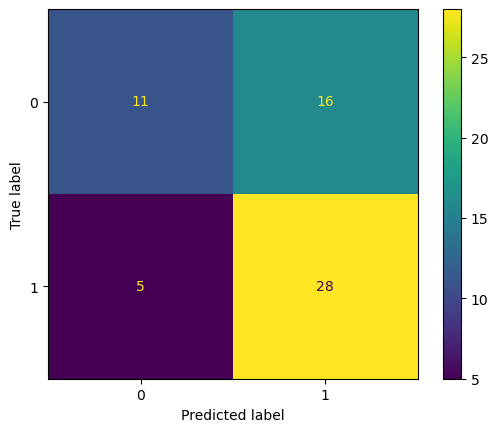

In [11]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_SuVeCrmd2 = Ht_De_Ptn_SuVeCrmd1.predict(Ht_De_Ptn_Xvl)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yvl, Ht_De_Ptn_SuVeCrmd2))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yvl, Ht_De_Ptn_SuVeCrmd2)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to validate:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

              precision    recall  f1-score   support

           0       0.81      0.38      0.52        34
           1       0.53      0.89      0.67        27

    accuracy                           0.61        61
   macro avg       0.67      0.64      0.59        61
weighted avg       0.69      0.61      0.58        61

Time to test: 0.017979145050048828


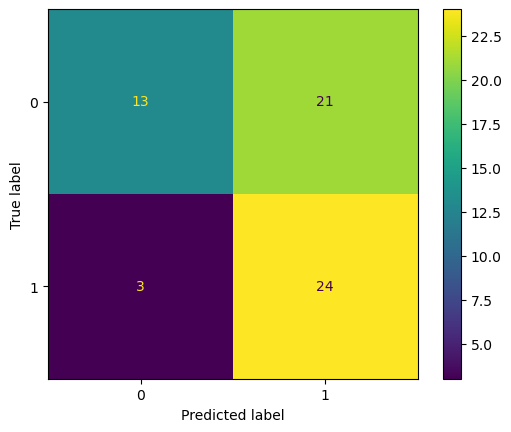

In [12]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_SuVeCrmd3 = Ht_De_Ptn_SuVeCrmd1.predict(Ht_De_Ptn_Xts)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yts, Ht_De_Ptn_SuVeCrmd3))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yts, Ht_De_Ptn_SuVeCrmd3)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to test:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

In [13]:
# Implementing RF Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier as Ht_De_Ptn_RmFtCr

Ht_De_Ptn_RFChp = {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'max_features': ['auto', 'sqrt', 'log2']}

Ht_De_Ptn_SuVeCrmd = Ht_De_Ptn_RmFtCr()
Ht_De_Ptn_SuVeCrmd = Ht_De_Ptn_Gdscv(Ht_De_Ptn_SuVeCrmd, Ht_De_Ptn_RFChp, cv=2, verbose=1)
Ht_De_Ptn_SuVeCrmd.fit(Ht_De_Ptn_Xtr.sample(100, random_state=42), Ht_De_Ptn_Ytr.sample(100, random_state=40))

print( Ht_De_Ptn_SuVeCrmd.best_params_)
print("The GSV score of RF Model: ", Ht_De_Ptn_SuVeCrmd.best_score_)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
{'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 200}
The GSV score of RF Model:  0.44


In [15]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_SuVeCrmd1 = Ht_De_Ptn_RmFtCr(**Ht_De_Ptn_SuVeCrmd.best_params_)
Ht_De_Ptn_SuVeCrmd1.fit(Ht_De_Ptn_Xtr, Ht_De_Ptn_Ytr)

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
print("Time to train:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

Time to train: 0.22156906127929688


              precision    recall  f1-score   support

           0       0.74      0.63      0.68        27
           1       0.73      0.82      0.77        33

    accuracy                           0.73        60
   macro avg       0.73      0.72      0.73        60
weighted avg       0.73      0.73      0.73        60

Time to validate: 0.03554821014404297


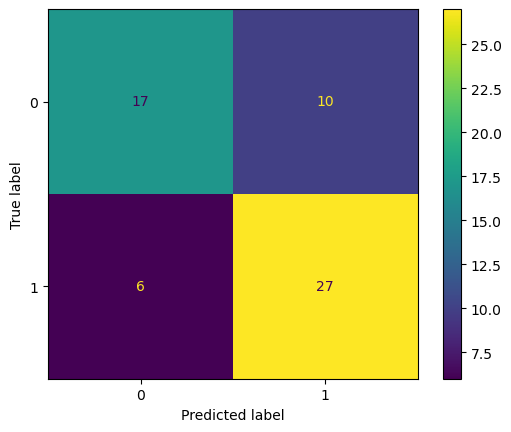

In [16]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_SuVeCrmd2 = Ht_De_Ptn_SuVeCrmd1.predict(Ht_De_Ptn_Xvl)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yvl, Ht_De_Ptn_SuVeCrmd2))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yvl, Ht_De_Ptn_SuVeCrmd2)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to validate:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

              precision    recall  f1-score   support

           0       0.89      0.74      0.81        34
           1       0.73      0.89      0.80        27

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61

Time to test: 0.028112173080444336


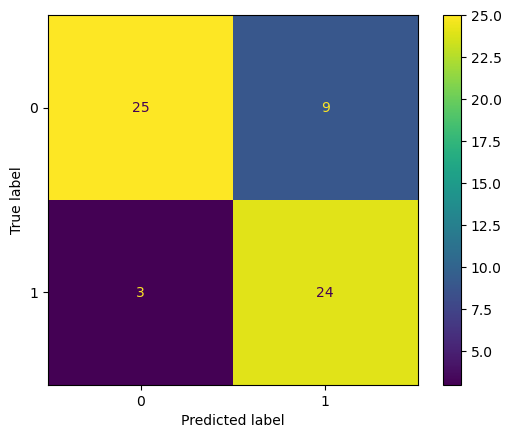

In [17]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_SuVeCrmd3 = Ht_De_Ptn_SuVeCrmd1.predict(Ht_De_Ptn_Xts)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yts, Ht_De_Ptn_SuVeCrmd3))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yts, Ht_De_Ptn_SuVeCrmd3)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to test:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

In [18]:
# Implementing MLP Classifier

In [19]:
from sklearn.neural_network import MLPClassifier as Ht_De_Ptn_MLPCr

Ht_De_Ptn_MLPhp = {
                'activation': ['relu', 'tanh', 'logistic'],
                'solver': ['sgd', 'adam'],
                'alpha': [0.0001, 0.001, 0.01],
                'learning_rate': ['constant', 'adaptive'],
                'max_iter': [100, 200, 300]}

Ht_De_Ptn_SuVeCrmd = Ht_De_Ptn_MLPCr()
Ht_De_Ptn_SuVeCrmd = Ht_De_Ptn_Gdscv(Ht_De_Ptn_SuVeCrmd, Ht_De_Ptn_MLPhp, cv=2, verbose=1)
Ht_De_Ptn_SuVeCrmd.fit(Ht_De_Ptn_Xtr.sample(100, random_state=42), Ht_De_Ptn_Ytr.sample(100, random_state=40))

print( Ht_De_Ptn_SuVeCrmd.best_params_)
print("The GSV score of MLP Classifier: ", Ht_De_Ptn_SuVeCrmd.best_score_)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
{'activation': 'tanh', 'alpha': 0.001, 'learning_rate': 'adaptive', 'max_iter': 300, 'solver': 'adam'}
The GSV score of MLP Classifier:  0.53


In [20]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_SuVeCrmd1 = Ht_De_Ptn_MLPCr(**Ht_De_Ptn_SuVeCrmd.best_params_)
Ht_De_Ptn_SuVeCrmd1.fit(Ht_De_Ptn_Xtr, Ht_De_Ptn_Ytr)

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
print("Time to train:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

Time to train: 0.16503381729125977


              precision    recall  f1-score   support

           0       0.71      0.63      0.67        27
           1       0.72      0.79      0.75        33

    accuracy                           0.72        60
   macro avg       0.72      0.71      0.71        60
weighted avg       0.72      0.72      0.71        60

Time to validate: 0.0036253929138183594


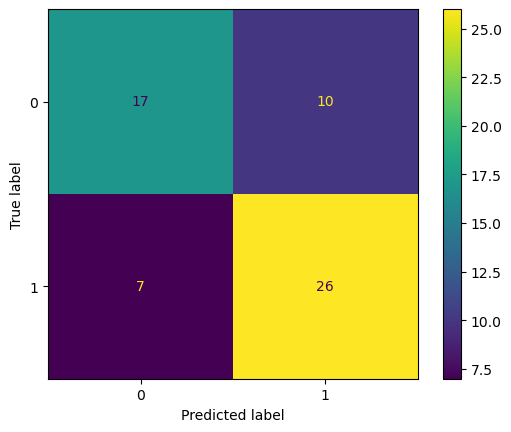

In [21]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_SuVeCrmd2 = Ht_De_Ptn_SuVeCrmd1.predict(Ht_De_Ptn_Xvl)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yvl, Ht_De_Ptn_SuVeCrmd2))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yvl, Ht_De_Ptn_SuVeCrmd2)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to validate:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        34
           1       0.68      0.78      0.72        27

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.75      0.74      0.74        61

Time to test: 0.01571512222290039


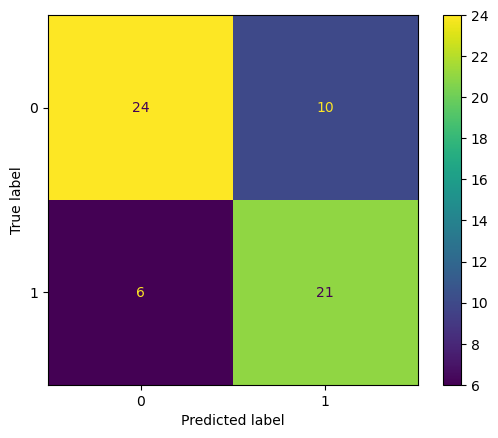

In [22]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_SuVeCrmd3 = Ht_De_Ptn_SuVeCrmd1.predict(Ht_De_Ptn_Xts)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yts, Ht_De_Ptn_SuVeCrmd3))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yts, Ht_De_Ptn_SuVeCrmd3)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to test:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

In [23]:
# Implementing DT Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier as Ht_De_Ptn_DnTeCr

Ht_De_Ptn_DThp = {'criterion': ['gini', 'entropy'],
                'max_depth': [10, 20, 30, 40],
                'min_samples_split': [3, 5, 7], 
                'min_samples_leaf': [1, 2, 4]}

Ht_De_Ptn_SuVeCrmd = Ht_De_Ptn_DnTeCr()
Ht_De_Ptn_SuVeCrmd = Ht_De_Ptn_Gdscv(Ht_De_Ptn_SuVeCrmd, Ht_De_Ptn_DThp, cv=2, verbose=1)
Ht_De_Ptn_SuVeCrmd.fit(Ht_De_Ptn_Xtr.sample(100, random_state=42), Ht_De_Ptn_Ytr.sample(100, random_state=40))

print( Ht_De_Ptn_SuVeCrmd.best_params_)
print("The GSV score of DT Model: ", Ht_De_Ptn_SuVeCrmd.best_score_)

Fitting 2 folds for each of 72 candidates, totalling 144 fits
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 7}
The GSV score of DT Model:  0.55


In [25]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_SuVeCrmd1 = Ht_De_Ptn_DnTeCr(**Ht_De_Ptn_SuVeCrmd.best_params_)
Ht_De_Ptn_SuVeCrmd1.fit(Ht_De_Ptn_Xtr, Ht_De_Ptn_Ytr)

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
print("Time to train:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

Time to train: 0.002987384796142578


              precision    recall  f1-score   support

           0       0.59      0.70      0.64        27
           1       0.71      0.61      0.66        33

    accuracy                           0.65        60
   macro avg       0.65      0.65      0.65        60
weighted avg       0.66      0.65      0.65        60

Time to validate: 0.012645721435546875


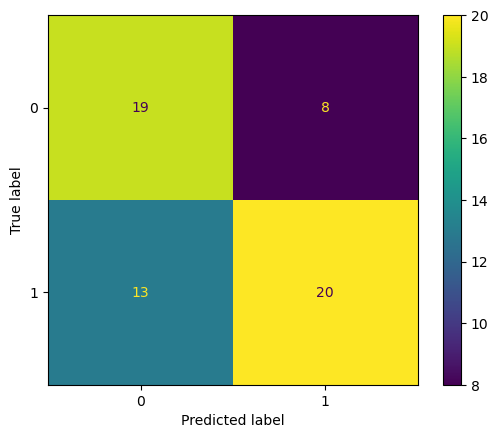

In [26]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_SuVeCrmd2 = Ht_De_Ptn_SuVeCrmd1.predict(Ht_De_Ptn_Xvl)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yvl, Ht_De_Ptn_SuVeCrmd2))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yvl, Ht_De_Ptn_SuVeCrmd2)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to validate:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        34
           1       0.70      0.70      0.70        27

    accuracy                           0.74        61
   macro avg       0.73      0.73      0.73        61
weighted avg       0.74      0.74      0.74        61

Time to test: 0.01817917823791504


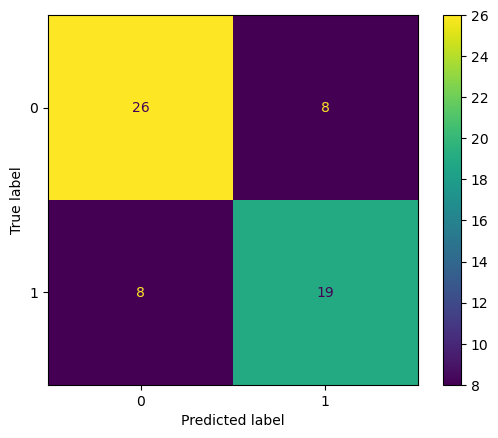

In [27]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_SuVeCrmd3 = Ht_De_Ptn_SuVeCrmd1.predict(Ht_De_Ptn_Xts)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yts, Ht_De_Ptn_SuVeCrmd3))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yts, Ht_De_Ptn_SuVeCrmd3)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to test:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)